# Error symmetry wave divisor function.

The divisor function can be written as a summation of waves (see link below). The error in the wave divisor function is mainly determined by it's neigbor divisors. The error is proportional to:

$$\large \varepsilon (x) \propto \sum_{\mathbb{X}\vert (x-1)}^{} \cos(k \mathbb{X}) + \sum_{\mathbb{X}\vert (x+1)}^{} \cos(k \mathbb{X})$$

Here $\mathbb{X} \vert (x-1)$ means: $\mathbb{X}$ divides $(x-1)$. Where k is a constant and determines the pulse width of each divisor wave, see link below for more information.

$$\large k=-\frac{2 \log(L)}{\pi \Delta x^{2}}$$

We can simulate the error for a number $x$ by keeping $L=0.5$ and vary $\Delta x$ between: 0.15 and 0.2 in 10000 steps. See simulation below. It is observed that for $x=odd$ the error $\varepsilon (x)$ tends to nonsymmetrical distribution. For $x=even$ the error $\varepsilon (x)$ tends to a symmetrical distribution.

Question:
Why does the error for odd and even numbers $x$ tend to behave symmetric and asymmetric?

More information: [Wave Divisor Function][1], [Question Stacks Exchange][2]

[1]: https://mybinder.org/v2/gh/oooVincentooo/Shared/master?filepath=Wave%20Divisor%20Function%20rev%202.4.ipynb
[2]: https://math.stackexchange.com/q/3427431

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2

import numpy as np

from IPython.display import display
import ipywidgets as widgets

from operator import add
from operator import sub
from operator import mul
from operator import truediv

from IPython.display import display

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


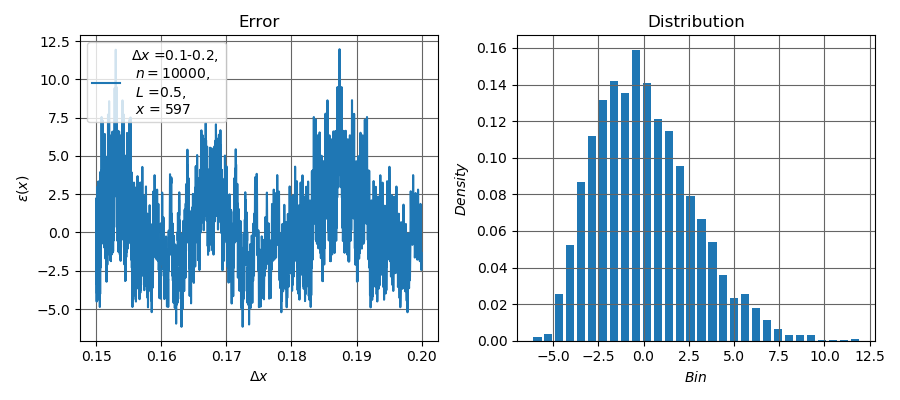

interactive(children=(Dropdown(description='$x$:', options=(550, 551, 552, 553, 554, 555, 556, 557, 558, 559, …

In [3]:
fig, ax2= plt2.subplots(1,2, figsize=(9, 4))

from ipywidgets import IntProgress

def update_plot(sx2):
    
    ax2[0].clear()
    ax2[1].clear()
    
    wave2=list(range(2,sx2+2))
    #print(wave)
    
    #dx range
    dxr2=np.linspace(0.15,0.2,10000)
    
    errt2=[0]*10000
    error2=[0]*10000
    #print(errt)

    #k range
    k=-2*np.log(0.5)/(np.pi*dxr2**2)

    f = IntProgress(min=0, max=sx2+2, description="")
    display(f)
    
    for x2 in wave2:
        
        # #N range
        # N1=(np.log(0.5))/(np.log(np.cos(np.pi*dxr/x)))
        # #print(N1)
        # N1=2*np.round(0.5*N1,0)     
        # #print(N1)
        f.value += 1
        

        if ((sx2-1)%x2)==0:
            error2=np.cos(k*x2)
            #error=np.cos(np.pi*N1/x)
            #print(str((sx-1)) +': ' + str(x))

        else:
            error2=[0]*10000

        errt2=list(map(add, errt2, error2))
        
        if ((sx2+1)%x2)==0:
            error2=np.cos(k*x2)
            #error=np.cos(np.pi*N1/x)
            #print(str((sx+1)) +': ' + str(x))
   
        else:
            error2=[0]*10000
        
        errt2=list(map(add, errt2, error2))
                
    
    #Plot Error
    units3 = '$\Delta x$ =0.1-0.2, \n $n=10000$, \n $L$ =0.5, \n $x$ = {}'
    ax2[0].plot(dxr2, errt2, color='#1f77b4', label=units3.format(sx2))
    ax2[0].legend(loc=2)
    ax2[0].set_title('Error')
    ax2[0].set_xlabel('$\Delta x$')
    ax2[0].set_ylabel('$\epsilon(x)$')
    ax2[0].grid(b=True, which='major', color='#666666', linestyle='-')
 
    #Plot histogram error
    ax2[1].hist(errt2, density=True, bins=30, rwidth=0.75)
    ax2[1].set_xlabel('$Bin$')
    ax2[1].set_ylabel('$Density$')
    ax2[1].set_title('Distribution')
    ax2[1].grid(b=True, which='major', color='#666666', linestyle='-')

    plt2.tight_layout()
    plt2.show()
    
    f.close()

sx2 = widgets.Dropdown(options=list(range(550,1001)), description='$x$:',value=550)   

widgets.interactive(update_plot, sx2=sx2)